In [6]:
root_dir = '/Users/tbeyer/gitLab_repos/SAR/sar-gs-testdata/'
in_img_path = '/Users/tbeyer/SAR/PALSAR_DATA/Sentinel_Chicago/Chicago_ECS_image_optimized_demirrored.tiff'
hdf_path = '/Users/tbeyer/SAR/PALSAR_DATA/Sentinel_Chicago/chicago.hdf5'

%matplotlib inline

In [7]:
cd $root_dir

/Users/tbeyer/gitLab_repos/SAR/sar-gs-testdata


In [8]:
from geolocation.geolocation import Geolocator

geo_friend = Geolocator(sar_data_file_path=hdf_path, 
                       image_file_path=in_img_path
            )

In [9]:
def xyz():
    #order ul, ll, lr, ur
    corner_line = [0, 0, geo_friend.image_pixels, geo_friend.image_pixels]
    corner_pix = [0, geo_friend.image_lines, geo_friend.image_lines, 0]

    corner_lat_lon = np.array(map(lambda line_pix: geo_friend.convert_line_pixel_to_lat_lon_height(line_pix[0], line_pix[1]), zip(corner_line, corner_pix)))
    #corner_lat_lon

In [10]:
%timeit xyz()

The slowest run took 11.26 times longer than the fastest. This could mean that an intermediate result is being cached 
100 loops, best of 3: 3.36 ms per loop


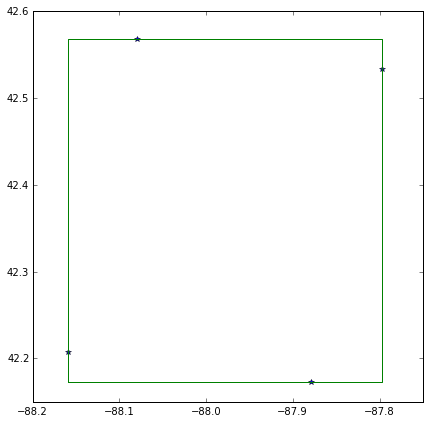

In [27]:
min_lat, min_lon = np.min(corner_lat_lon[:, 0]), np.min(corner_lat_lon[:, 1])
max_lat, max_lon = np.max(corner_lat_lon[:, 0]), np.max(corner_lat_lon[:, 1])

rect_sides = ([min_lon, max_lon, max_lon, min_lon, min_lon], [min_lat, min_lat, max_lat, max_lat, min_lat])

fig = plt.figure(figsize=(7, 7))
plt.plot(corner_lat_lon[:, 1], corner_lat_lon[:, 0], '*', *rect_sides)
plt.axis('equal')
plt.show()

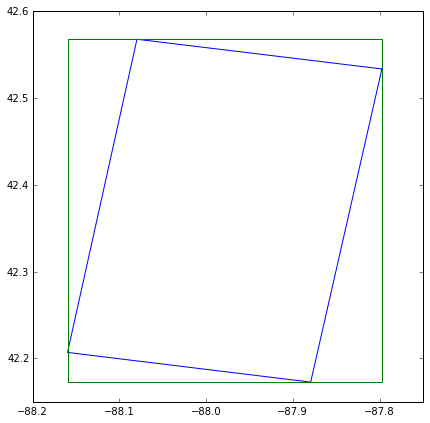

In [28]:
corner_sides = ([corner_lat_lon[0,1], corner_lat_lon[1,1], corner_lat_lon[2,1], corner_lat_lon[3,1], corner_lat_lon[0,1]], 
                [corner_lat_lon[0,0], corner_lat_lon[1,0], corner_lat_lon[2,0], corner_lat_lon[3,0], corner_lat_lon[0,0]])
                                                                                         
fig = plt.figure(figsize=(7, 7))
plt.plot(*corner_sides)
plt.plot(*rect_sides)
plt.axis('equal')
plt.show()